In [2]:
# Reload modules automatically
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [3]:
from utils import ExperimentManager
import matplotlib.pyplot as plt

In [4]:
exp_d = dict(
    collection = "l_coramlb_cert_label_coll_50",
    start_id = 1,
    end_id = 1035,
    n_seeds = 5,
)
delta_l = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 1]

In [5]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman"
})

## Label cert

In [6]:
experiments = [exp_d]
experiment_manager = ExperimentManager(experiments)

In [8]:
models = ["GCN", "SGC", "APPNP", "GIN", "GraphSAGE", "GCN_skipalpha", "GCN_skippc","MLP"]
delta_l = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5]
#delta_l = [0.2, 0.25]
df = experiment_manager.rank_models(models, delta_l=delta_l,
                                    include_model_rank=False)
df
print(df.to_latex(index=False, escape=False))

\begin{tabular}{lllll}
\toprule
model & weak & intermediate & strong & total \\
\midrule
GCN & 5.0 & 3.5 & 6.0 & 4.29 \\
SGC & 1.5 & 1.0 & 6.0 & 1.86 \\
APPNP & 1.5 & 5.75 & 8.0 & 4.86 \\
GIN & 4.5 & 7.75 & 2.0 & 6.0 \\
GraphSAGE & 6.5 & 4.0 & 3.0 & 4.57 \\
GCN_skipalpha & 4.5 & 3.25 & 5.0 & 3.86 \\
GCN_skippc & 4.5 & 3.0 & 4.0 & 3.57 \\
MLP & 8.0 & 7.25 & 1.0 & 6.57 \\
\bottomrule
\end{tabular}



In [7]:
models = ["GCN", "SGC", "APPNP", "GIN", "GraphSAGE", "GCN_skipalpha", "GCN_skippc","MLP"]
legend_labels = ["GCN", "SGC", "APPNP", "GIN", "GraphSAGE", "GCN Skip-$\\alpha$", "GCN Skip-PC","MLP"]
delta_l = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5]
#delta_l = [0.2, 0.25]
df = experiment_manager.models_robustness(models, delta_l, legend_labels, 
                                          certified_ratio=True,
                                          bold=False, to_latex=False)
df

,$\epsilon$,0.05,0.1,0.15,0.2,0.25,0.3,0.5
0,GCN,86.4±6.1,55.6±10.7,46.8±6.0,43.6±2.3,43.6±2.3,41.6±2.0,8.4±3.9
1,SGC,88.8±5.2,63.2±9.2,49.6±6.1,46.0±4.4,45.2±3.5,42.0±2.8,8.4±3.4
2,APPNP,89.6±7.9,62.4±12.2,45.6±2.7,42.8±1.6,42.0±1.8,38.8±2.7,0.4±0.8
3,GIN,81.6±4.1,61.6±4.5,44.8±5.5,38.0±5.2,36.8±5.7,33.6±6.4,13.2±3.0
4,GraphSAGE,80.4±6.5,56.8±5.2,48.4±6.1,45.2±4.1,42.4±3.9,37.6±3.9,12.0±2.8
5,GCN Skip-$\alpha$,85.2±6.4,57.2±10.2,47.6±5.6,44.4±2.9,43.6±2.3,41.2±3.2,9.2±3.9
6,GCN Skip-PC,84.4±6.0,58.0±3.3,49.2±3.5,45.2±3.0,43.6±3.4,39.2±3.7,10.4±4.1
7,MLP,66.0±5.1,44.0±5.8,40.0±5.2,38.8±5.3,37.6±5.9,34.4±6.4,17.2±5.3


In [60]:
models = ["GCN", "SGC", "APPNP", "GIN", "GraphSAGE", "GCN_skipalpha", "GCN_skippc","MLP"]
legend_labels = ["GCN", "SGC", "APPNP", "GIN", "GraphSAGE", "GCN Skip-$\\alpha$", "GCN Skip-PC","MLP"]
delta_l = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5]
#delta_l = [0.2, 0.25]
df = experiment_manager.models_delta(models, delta_l, legend_labels)
print(df.to_latex(index=False, escape=False))

[['\\textbf{GCN}' '\\textbf{SGC}' '\\textbf{APPNP}' '\\textbf{GIN}'
  '\\textbf{GraphSAGE}' '\\textbf{GCN Skip-$\\alpha$}'
  '\\textbf{GCN Skip-PC}' '\\textbf{MLP}']]
['$\\mathbf{0.05}$', '$\\mathbf{0.10}$', '$\\mathbf{0.15}$', '$\\mathbf{0.20}$', '$\\mathbf{0.25}$', '$\\mathbf{0.30}$', '$\\mathbf{0.50}$']
\begin{tabular}{llllllll}
\toprule
$\epsilon$ & $\mathbf{0.05}$ & $\mathbf{0.10}$ & $\mathbf{0.15}$ & $\mathbf{0.20}$ & $\mathbf{0.25}$ & $\mathbf{0.30}$ & $\mathbf{0.50}$ \\
\midrule
\textbf{GCN} & 86.4 $\pm$ 6.1 & 55.6 $\pm$ 10.7 & 46.8 $\pm$ 6.0 & 43.6 $\pm$ 2.3 & 43.6 $\pm$ 2.3 & 41.6 $\pm$ 2.0 & 8.4 $\pm$ 3.9 \\
\textbf{SGC} & +2.4 $\pm$ 5.2 & \textbf{+7.6}$\mathbf{\pm}$\textbf{9.2} & \textbf{+2.8}$\mathbf{\pm}$\textbf{6.1} & \textbf{+2.4}$\mathbf{\pm}$\textbf{4.4} & \textbf{+1.6}$\mathbf{\pm}$\textbf{3.5} & \textbf{+0.4}$\mathbf{\pm}$\textbf{2.8} & +0.0 $\pm$ 3.4 \\
\textbf{APPNP} & \textbf{+3.2}$\mathbf{\pm}$\textbf{7.9} & +6.8 $\pm$ 12.2 & -1.2 $\pm$ 2.7 & -0.8 $\pm$ 1.6 & -1

In [42]:
models = ["GCN", "SGC", "APPNP", "GIN", "GraphSAGE", "GCN_skipalpha", "GCN_skippc","MLP"]
delta_l = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]
#delta_l = [0.2, 0.25]
df = experiment_manager.rank_models(models, delta_l=delta_l,
                                    include_model_rank=False)
df
print(df.to_latex(index=False, escape=False))

\begin{tabular}{lllll}
\toprule
model & weak & intermediate & strong & total \\
\midrule
GCN & 5.0 & 3.5 & 3.5 & 3.88 \\
SGC & 1.5 & 1.0 & 5.0 & 2.12 \\
APPNP & 1.5 & 5.75 & 8.0 & 5.25 \\
GIN & 4.5 & 7.75 & 3.5 & 5.88 \\
GraphSAGE & 6.5 & 4.0 & 4.5 & 4.75 \\
GCN_skipalpha & 4.5 & 3.25 & 3.5 & 3.62 \\
GCN_skippc & 4.5 & 3.0 & 5.5 & 4.0 \\
MLP & 8.0 & 7.25 & 2.0 & 6.12 \\
\bottomrule
\end{tabular}



delta: 0.05 racc: 0.844 std: 0.07
delta: 0.10 racc: 0.588 std: 0.10
delta: 0.15 racc: 0.456 std: 0.07
delta: 0.20 racc: 0.408 std: 0.04
delta: 0.25 racc: 0.412 std: 0.05
delta: 0.30 racc: 0.380 std: 0.02
delta: 0.40 racc: 0.220 std: 0.04
delta: 0.50 racc: 0.068 std: 0.03
delta: 1.00 racc: 0.000 std: 0.00


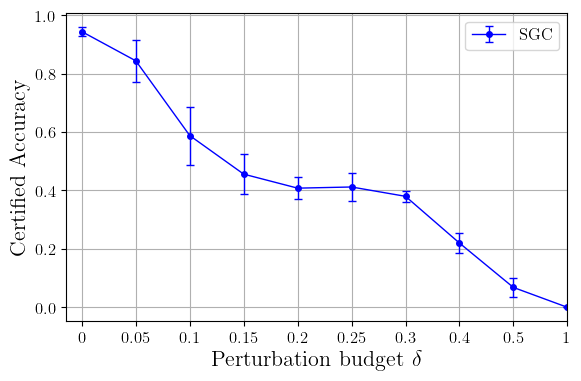

In [16]:
models = ["SGC"]
delta_l = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 1]
#delta_l = [0.2, 0.25]
experiment_manager.plot_robust_acc_delta(models, delta_l=delta_l, use_style=True)

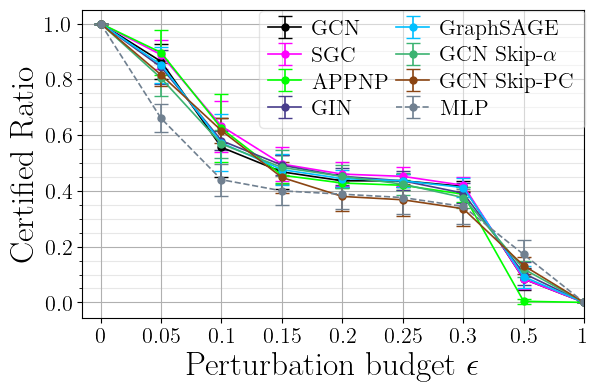

In [62]:
models = ["GCN", "SGC", "APPNP", "GCN_skippc", "GCN_skipalpha", "GraphSAGE", "GIN", "MLP"]
legend_labels = ["GCN", "SGC", "APPNP", "GIN", "GraphSAGE", r"GCN Skip-$\alpha$", "GCN Skip-PC", "MLP"]
delta_l = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 1]
savefig = "coramlb_coll.pdf"
legend_y = "Certified Ratio"
legend_x = r"Perturbation budget $\epsilon$"
linewidth = 1.2
markersize = 5
capsize = 5
label_fontsize = 24
legend_fontsize = 16
ticks_fontsize = 16
use_custom_legend = True
legend_args = dict(
    framealpha = 0.5,
    handlelength = 1.5,
    handletextpad = 0.5,
    labelspacing = 0.3,
    loc="lower left",
    #bbox_to_anchor=(0.60,.49),
    bbox_to_anchor=(0.33,.58),
    ncol=2,
    columnspacing=0.3,
    #columnspacing=1
)

experiment_manager.plot_robust_acc_delta(models, delta_l=delta_l,
                                            legend_labels=legend_labels,
                                            certified_ratio=True,
                                            use_style=True,
                                            savefig=savefig,
                                            legend_y=legend_y,
                                            legend_x=legend_x,
                                            label_fontsize=label_fontsize,
                                            legend_fontsize=legend_fontsize,
                                            ticks_fontsize=ticks_fontsize,
                                            markersize=markersize,
                                            capsize=capsize,
                                            linewidth=linewidth,
                                            use_custom_legend=True,
                                            legend_args=legend_args)

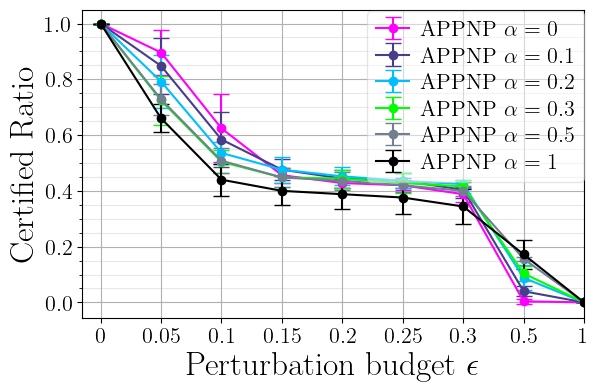

In [63]:
models = ["APPNP", "APPNP_alpha0.1", "APPNP_alpha0.2", "APPNP_alpha0.3", "APPNP_alpha0.5", "MLP"]
legend_labels = [r"APPNP $\alpha=0$", r"APPNP $\alpha=0.1$", r"APPNP $\alpha=0.2$", r"APPNP $\alpha=0.3$", r"APPNP $\alpha=0.5$", r"APPNP $\alpha=1$"]
delta_l = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 1]
savefig = "coramlb_appnp.pdf"
legend_y = "Certified Ratio"
legend_x = r"Perturbation budget $\epsilon$"
linewidth = 1.5
markersize = 6
capsize = 6
label_fontsize = 24
legend_fontsize = 16
ticks_fontsize = 16
use_custom_legend = True
legend_args = dict(
    framealpha = 0.5,
    handlelength = 1.5,
    handletextpad = 0.5,
    labelspacing = 0.3,
    loc="lower left",
    bbox_to_anchor=(0.545,.405),
    #bbox_to_anchor=(0.33,.585),
    ncol=1,
    #columnspacing=0.3,
    columnspacing=1
)

experiment_manager.plot_robust_acc_delta(models, delta_l=delta_l,
                                            legend_labels=legend_labels,
                                            certified_ratio=True,
                                            use_style=False,
                                            savefig=savefig,
                                            legend_y=legend_y,
                                            legend_x=legend_x,
                                            label_fontsize=label_fontsize,
                                            legend_fontsize=legend_fontsize,
                                            ticks_fontsize=ticks_fontsize,
                                            markersize=markersize,
                                            capsize=capsize,
                                            linewidth=linewidth,
                                            use_custom_legend=True,
                                            legend_args=legend_args)

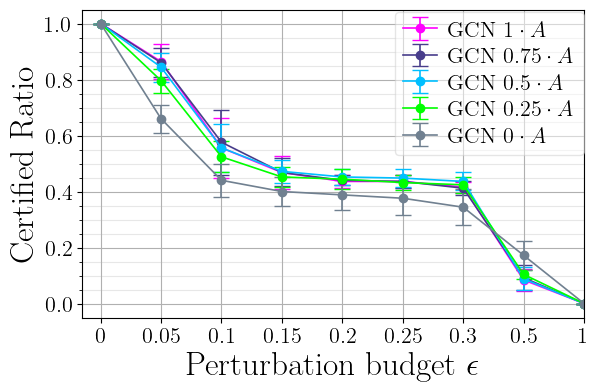

In [64]:
models = ["GCN", "GCN_weigh0.75", "GCN_weigh0.5", "GCN_weigh0.25", "MLP"]
legend_labels = [r"GCN $1\cdot A$", r"GCN $0.75\cdot A$", r"GCN $0.5\cdot A$", r"GCN $0.25\cdot A$", r"GCN $0\cdot A$"]
delta_l = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 1]
savefig = "coramlb_weigh_adjacency.pdf"
legend_y = "Certified Ratio"
legend_x = r"Perturbation budget $\epsilon$"
linewidth = 1.2
markersize = 6
capsize = 6
label_fontsize = 24
legend_fontsize = 16
ticks_fontsize = 16
use_custom_legend = True
legend_args = dict(
    framealpha = 0.5,
    handlelength = 1.5,
    handletextpad = 0.5,
    labelspacing = 0.3,
    loc="lower left",
    bbox_to_anchor=(0.60,.49),
    #bbox_to_anchor=(0.33,.585),
    ncol=1,
    #columnspacing=0.3,
    columnspacing=1
)

experiment_manager.plot_robust_acc_delta(models, delta_l=delta_l,
                                            legend_labels=legend_labels,
                                            certified_ratio=True,
                                            use_style=False,
                                            savefig=savefig,
                                            legend_y=legend_y,
                                            legend_x=legend_x,
                                            label_fontsize=label_fontsize,
                                            legend_fontsize=legend_fontsize,
                                            ticks_fontsize=ticks_fontsize,
                                            markersize=markersize,
                                            capsize=capsize,
                                            linewidth=linewidth,
                                            use_custom_legend=True,
                                            legend_args=legend_args)

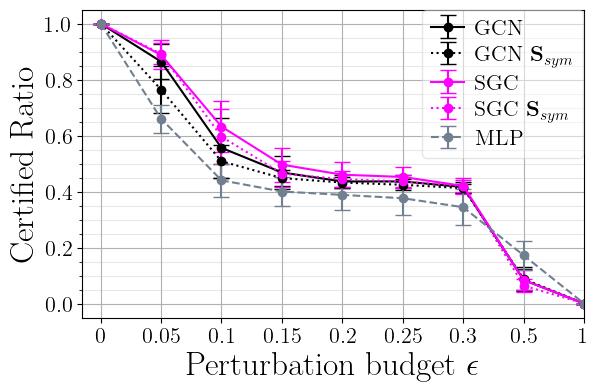

In [65]:
models = ["GCN", "GCN_sym", "SGC", "SGC_sym", "MLP"]
legend_labels = [r"GCN", r"GCN $\mathbf{S}_{sym}$", "SGC", r"SGC $\mathbf{S}_{sym}$", "MLP"]
savefig = "coramlb_coll_sym.pdf"
legend_y = "Certified Ratio"
legend_x = r"Perturbation budget $\epsilon$"
linewidth = 1.5
markersize = 6
capsize = 6
label_fontsize = 24
legend_fontsize = 16
ticks_fontsize = 16
use_custom_legend = True
legend_args = dict(
    framealpha = 0.5,
    handlelength = 1.5,
    handletextpad = 0.5,
    labelspacing = 0.3,
    loc="lower left",
    bbox_to_anchor=(0.655,.483),
    #bbox_to_anchor=(0.33,.585),
    ncol=1,
    #columnspacing=0.3,
    columnspacing=1
)

experiment_manager.plot_robust_acc_delta(models, delta_l=delta_l,
                                            legend_labels=legend_labels,
                                            certified_ratio=True,
                                            use_style=True,
                                            savefig=savefig,
                                            legend_y=legend_y,
                                            legend_x=legend_x,
                                            label_fontsize=label_fontsize,
                                            legend_fontsize=legend_fontsize,
                                            ticks_fontsize=ticks_fontsize,
                                            markersize=markersize,
                                            capsize=capsize,
                                            linewidth=linewidth,
                                            use_custom_legend=True,
                                            legend_args=legend_args)

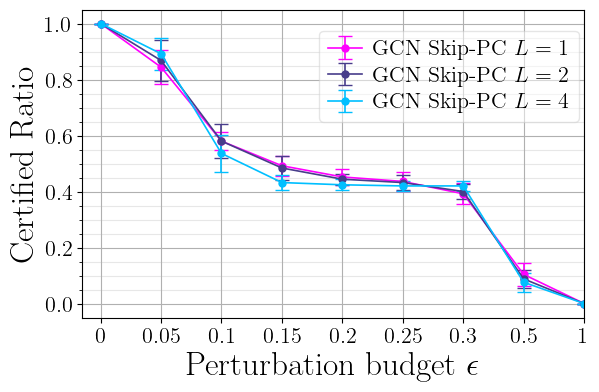

In [66]:
models = ["GCN_skippc", "GCN_skippc_L2", "GCN_skippc_L4"]
legend_labels = ["GCN Skip-PC $L=1$", "GCN Skip-PC $L=2$", "GCN Skip-PC $L=4$"]
delta_l = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 1]
savefig = "coramlb_coll_skippc_depth.pdf"
legend_y = "Certified Ratio"
legend_x = r"Perturbation budget $\epsilon$"
linewidth = 1.2
markersize = 5
capsize = 5
label_fontsize = 24
legend_fontsize = 16
ticks_fontsize = 16
use_custom_legend = True
legend_args = dict(
    framealpha = 0.5,
    handlelength = 1.5,
    handletextpad = 0.5,
    labelspacing = 0.3,
    loc="lower left",
    bbox_to_anchor=(0.45,.60),
    #bbox_to_anchor=(0.33,.585),
    ncol=1,
    #columnspacing=0.3,
    columnspacing=1
)

experiment_manager.plot_robust_acc_delta(models, delta_l=delta_l,
                                            legend_labels=legend_labels,
                                            certified_ratio=True,
                                            use_style=False,
                                            savefig=savefig,
                                            legend_y=legend_y,
                                            legend_x=legend_x,
                                            label_fontsize=label_fontsize,
                                            legend_fontsize=legend_fontsize,
                                            ticks_fontsize=ticks_fontsize,
                                            markersize=markersize,
                                            capsize=capsize,
                                            linewidth=linewidth,
                                            use_custom_legend=True,
                                            legend_args=legend_args)

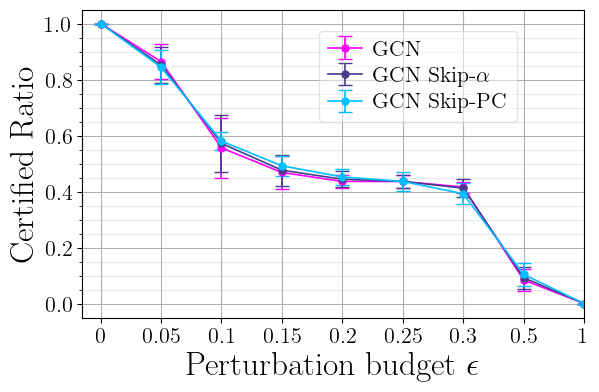

In [7]:
models = ["GCN", "GCN_skipalpha", "GCN_skippc"]
legend_labels = ["GCN", r"GCN Skip-$\alpha$", "GCN Skip-PC"]
delta_l = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 1]
savefig = "coramlb_coll_skip_L=1.pdf"
legend_y = "Certified Ratio"
legend_x = r"Perturbation budget $\epsilon$"
linewidth = 1.2
markersize = 5
capsize = 5
label_fontsize = 24
legend_fontsize = 16
ticks_fontsize = 16
use_custom_legend = True
legend_args = dict(
    framealpha = 0.5,
    handlelength = 1.5,
    handletextpad = 0.5,
    labelspacing = 0.3,
    loc="lower left",
    bbox_to_anchor=(0.45,.60),
    #bbox_to_anchor=(0.33,.585),
    ncol=1,
    #columnspacing=0.3,
    columnspacing=1
)

experiment_manager.plot_robust_acc_delta(models, delta_l=delta_l,
                                            legend_labels=legend_labels,
                                            certified_ratio=True,
                                            use_style=False,
                                            savefig=savefig,
                                            legend_y=legend_y,
                                            legend_x=legend_x,
                                            label_fontsize=label_fontsize,
                                            legend_fontsize=legend_fontsize,
                                            ticks_fontsize=ticks_fontsize,
                                            markersize=markersize,
                                            capsize=capsize,
                                            linewidth=linewidth,
                                            use_custom_legend=True,
                                            legend_args=legend_args)

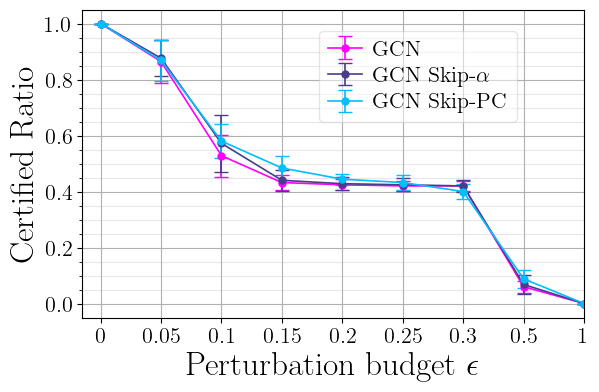

In [8]:
models = ["GCN_L2", "GCN_skipalpha_L2", "GCN_skippc_L2"]
legend_labels = ["GCN", r"GCN Skip-$\alpha$", "GCN Skip-PC"]
delta_l = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 1]
savefig = "coramlb_coll_skip_L=2.pdf"
legend_y = "Certified Ratio"
legend_x = r"Perturbation budget $\epsilon$"
linewidth = 1.2
markersize = 5
capsize = 5
label_fontsize = 24
legend_fontsize = 16
ticks_fontsize = 16
use_custom_legend = True
legend_args = dict(
    framealpha = 0.5,
    handlelength = 1.5,
    handletextpad = 0.5,
    labelspacing = 0.3,
    loc="lower left",
    bbox_to_anchor=(0.45,.60),
    #bbox_to_anchor=(0.33,.585),
    ncol=1,
    #columnspacing=0.3,
    columnspacing=1
)

experiment_manager.plot_robust_acc_delta(models, delta_l=delta_l,
                                            legend_labels=legend_labels,
                                            certified_ratio=True,
                                            use_style=False,
                                            savefig=savefig,
                                            legend_y=legend_y,
                                            legend_x=legend_x,
                                            label_fontsize=label_fontsize,
                                            legend_fontsize=legend_fontsize,
                                            ticks_fontsize=ticks_fontsize,
                                            markersize=markersize,
                                            capsize=capsize,
                                            linewidth=linewidth,
                                            use_custom_legend=True,
                                            legend_args=legend_args)

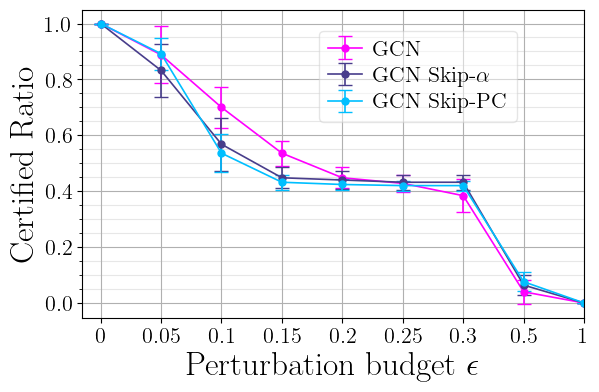

In [9]:
models = ["GCN_L4", "GCN_skipalpha_L4", "GCN_skippc_L4"]
legend_labels = ["GCN", r"GCN Skip-$\alpha$", "GCN Skip-PC"]
delta_l = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 1]
savefig = "coramlb_coll_skip_L=4.pdf"
legend_y = "Certified Ratio"
legend_x = r"Perturbation budget $\epsilon$"
linewidth = 1.2
markersize = 5
capsize = 5
label_fontsize = 24
legend_fontsize = 16
ticks_fontsize = 16
use_custom_legend = True
legend_args = dict(
    framealpha = 0.5,
    handlelength = 1.5,
    handletextpad = 0.5,
    labelspacing = 0.3,
    loc="lower left",
    bbox_to_anchor=(0.45,.60),
    #bbox_to_anchor=(0.33,.585),
    ncol=1,
    #columnspacing=0.3,
    columnspacing=1
)

experiment_manager.plot_robust_acc_delta(models, delta_l=delta_l,
                                            legend_labels=legend_labels,
                                            certified_ratio=True,
                                            use_style=False,
                                            savefig=savefig,
                                            legend_y=legend_y,
                                            legend_x=legend_x,
                                            label_fontsize=label_fontsize,
                                            legend_fontsize=legend_fontsize,
                                            ticks_fontsize=ticks_fontsize,
                                            markersize=markersize,
                                            capsize=capsize,
                                            linewidth=linewidth,
                                            use_custom_legend=True,
                                            legend_args=legend_args)

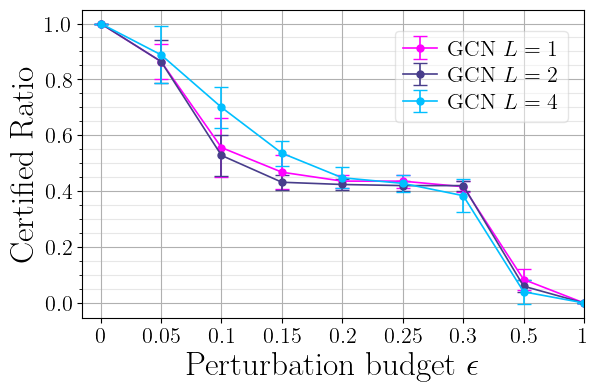

In [67]:
models = ["GCN", "GCN_L2", "GCN_L4"]
legend_labels = [r"GCN $L=1$", r"GCN $L=2$", r"GCN $L=4$"]
delta_l = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 1]
savefig = "coramlb_coll_gcn_depth.pdf"
legend_y = "Certified Ratio"
legend_x = r"Perturbation budget $\epsilon$"
linewidth = 1.2
markersize = 5
capsize = 5
label_fontsize = 24
legend_fontsize = 16
ticks_fontsize = 16
use_custom_legend = True
legend_args = dict(
    framealpha = 0.5,
    handlelength = 1.5,
    handletextpad = 0.5,
    labelspacing = 0.3,
    loc="lower left",
    bbox_to_anchor=(0.60,.60),
    #bbox_to_anchor=(0.33,.585),
    ncol=1,
    #columnspacing=0.3,
    columnspacing=1
)

experiment_manager.plot_robust_acc_delta(models, delta_l=delta_l,
                                            legend_labels=legend_labels,
                                            certified_ratio=True,
                                            use_style=False,
                                            savefig=savefig,
                                            legend_y=legend_y,
                                            legend_x=legend_x,
                                            label_fontsize=label_fontsize,
                                            legend_fontsize=legend_fontsize,
                                            ticks_fontsize=ticks_fontsize,
                                            markersize=markersize,
                                            capsize=capsize,
                                            linewidth=linewidth,
                                            use_custom_legend=True,
                                            legend_args=legend_args)

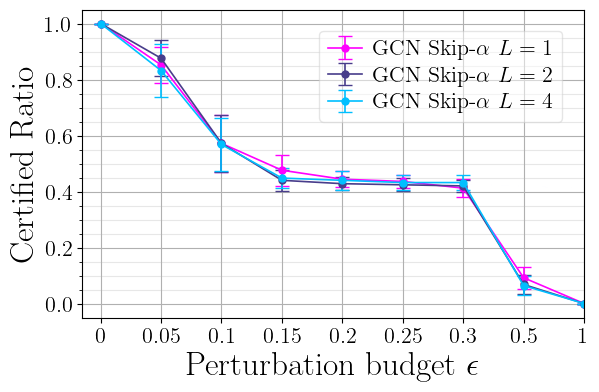

In [68]:
models = ["GCN_skipalpha", "GCN_skipalpha_L2", "GCN_skipalpha_L4"]
legend_labels = [r"GCN Skip-$\alpha$ $L=1$", r"GCN Skip-$\alpha$ $L=2$", r"GCN Skip-$\alpha$ $L=4$"]
delta_l = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 1]
savefig = "coramlb_coll_skipalpha_depth.pdf"
legend_y = "Certified Ratio"
legend_x = r"Perturbation budget $\epsilon$"
linewidth = 1.2
markersize = 5
capsize = 5
label_fontsize = 24
legend_fontsize = 16
ticks_fontsize = 16
use_custom_legend = True
legend_args = dict(
    framealpha = 0.5,
    handlelength = 1.5,
    handletextpad = 0.5,
    labelspacing = 0.3,
    loc="lower left",
    bbox_to_anchor=(0.45,.60),
    #bbox_to_anchor=(0.33,.585),
    ncol=1,
    #columnspacing=0.3,
    columnspacing=1
)

experiment_manager.plot_robust_acc_delta(models, delta_l=delta_l,
                                            legend_labels=legend_labels,
                                            certified_ratio=True,
                                            use_style=False,
                                            savefig=savefig,
                                            legend_y=legend_y,
                                            legend_x=legend_x,
                                            label_fontsize=label_fontsize,
                                            legend_fontsize=legend_fontsize,
                                            ticks_fontsize=ticks_fontsize,
                                            markersize=markersize,
                                            capsize=capsize,
                                            linewidth=linewidth,
                                            use_custom_legend=True,
                                            legend_args=legend_args)